# Methodology and study procedure are described well. (2P)
Johannes

# Data of at least three participants is captured appropriatly. (3P)

already done

# Results are reported, compared, and discussed well. (2P)
Michael

In [146]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
import numpy as np

#load csv
df1 = pd.read_csv('fittslaw_1.csv')     # participant 1
df2 = pd.read_csv('fittslaw_2.csv')     # participant 2
df3 = pd.read_csv('fittslaw_3.csv')     # participant 3

#dataframes
df1['Participant ID'] = 1
df2['Participant ID'] = 2
df3['Participant ID'] = 3
df = pd.concat([df1, df2, df3], ignore_index=True)

#converts otherwise error
df['Click Times'] = df['Click Times'].apply(lambda x: json.loads(x))

#new rows
df['ID'] = df.apply(lambda row: math.log2(2 * row['Distance'] / row['Radius']), axis=1)
df['Accuracy'] = ((df['Total Clicks'] - df['Missed Clicks']) / df['Total Clicks']) * 100
df['Hits'] = df['Total Clicks'] - df['Missed Clicks']

#input devices
mouse_data = df[df['Input Device'] == 'mouse']
touchpad_data = df[df['Input Device'] == 'touchpad']
mouselatency_data = df[df['Input Device'] == 'mouselatency']
pointing_data = df[df['Input Device'] == 'pointing']

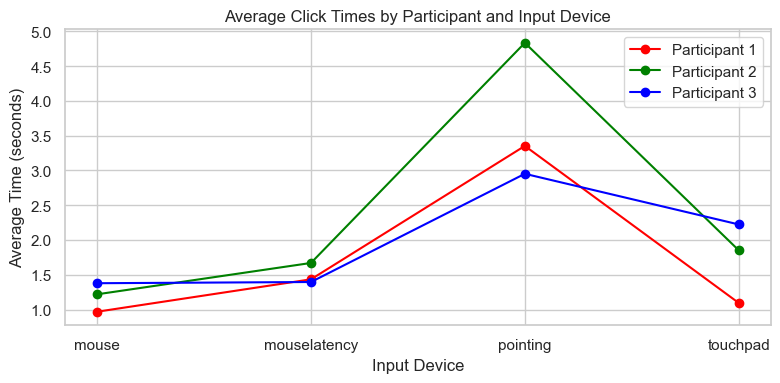

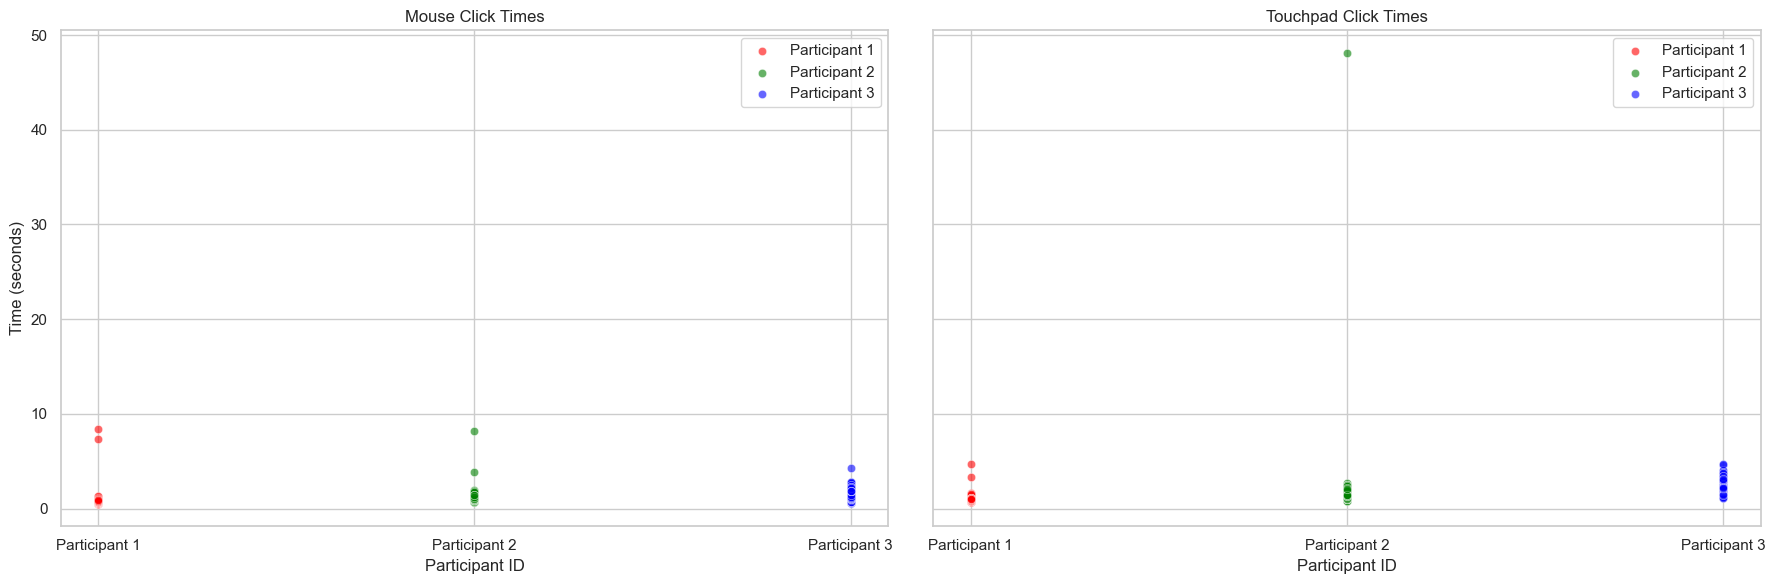

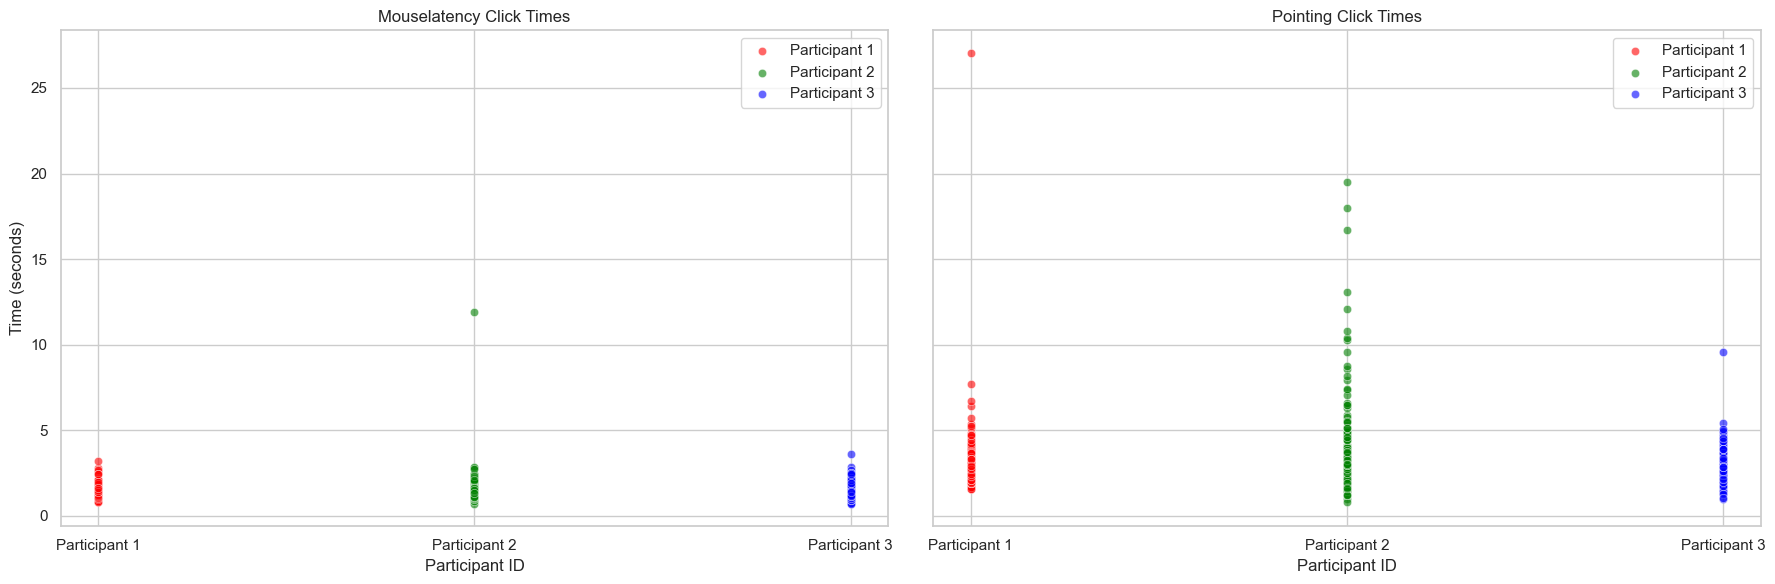

In [147]:
#with the help of chatgpt
#scatter plots
def prepare_scatter_data(device_data):
    scatter_data = []
    for idx, row in device_data.iterrows():
        participant_id = row['Participant ID']
        click_times = row['Click Times']
        scatter_data.extend([(participant_id, click_time) for click_time in click_times])
    return scatter_data

mouse_scatter_data = prepare_scatter_data(mouse_data)
touchpad_scatter_data = prepare_scatter_data(touchpad_data)
mouselatency_scatter_data = prepare_scatter_data(mouselatency_data)
pointing_scatter_data = prepare_scatter_data(pointing_data)

def plot_side_by_side(scatter_data1, device_name1, scatter_data2, device_name2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    colors = {1: 'red', 2: 'green', 3: 'blue'}
    labels = {1: 'Participant 1', 2: 'Participant 2', 3: 'Participant 3'}

    #first scatter plot
    for participant_id, color in colors.items():
        x = [participant_id] * sum(1 for pid, _ in scatter_data1 if pid == participant_id)
        y = [click_time for pid, click_time in scatter_data1 if pid == participant_id]
        axes[0].scatter(x, y, color=color, label=labels[participant_id], alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[0].set_xticks([1, 2, 3])
    axes[0].set_xticklabels(['Participant 1', 'Participant 2', 'Participant 3'])
    axes[0].set_title(f'{device_name1.capitalize()} Click Times')
    axes[0].set_xlabel('Participant ID')
    axes[0].set_ylabel('Time (seconds)')
    axes[0].legend()

    #second scatter plot
    for participant_id, color in colors.items():
        x = [participant_id] * sum(1 for pid, _ in scatter_data2 if pid == participant_id)
        y = [click_time for pid, click_time in scatter_data2 if pid == participant_id]
        axes[1].scatter(x, y, color=color, label=labels[participant_id], alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[1].set_xticks([1, 2, 3])
    axes[1].set_xticklabels(['Participant 1', 'Participant 2', 'Participant 3'])
    axes[1].set_title(f'{device_name2.capitalize()} Click Times')
    axes[1].set_xlabel('Participant ID')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

#-----------
#overview 
def calculate_average_times(click_times):
    total_sum = sum(click_times, [])
    num_elements = len(total_sum)
    if num_elements > 0:
        return sum(total_sum) / num_elements
    else:
        return 0
#grouping
avg_times = df.groupby(['Participant ID', 'Input Device'])['Click Times'].apply(calculate_average_times).reset_index()

#average plot
def plot_average_times(avg_times):
    fig, ax = plt.subplots(figsize=(8, 4))
    colors = {1: 'red', 2: 'green', 3: 'blue'}
    labels = {1: 'Participant 1', 2: 'Participant 2', 3: 'Participant 3'}

    for participant_id in [1, 2, 3]:
        participant_data = avg_times[avg_times['Participant ID'] == participant_id]
        x = list(range(len(participant_data)))
        y = participant_data['Click Times']
        ax.plot(x, y, marker='o', linestyle='-', color=colors[participant_id], label=labels[participant_id])

    ax.set_xticks(range(len(avg_times['Input Device'].unique())))
    ax.set_xticklabels(avg_times['Input Device'].unique())
    ax.set_xlabel('Input Device')
    ax.set_ylabel('Average Time (seconds)')
    ax.set_title('Average Click Times by Participant and Input Device')
    ax.legend()

    plt.tight_layout()
    plt.show()

#plots
plot_average_times(avg_times)
plot_side_by_side(mouse_scatter_data, 'mouse', touchpad_scatter_data, 'touchpad')
plot_side_by_side(mouselatency_scatter_data, 'mouselatency', pointing_scatter_data, 'pointing')




### movement time participants and movement time input device 

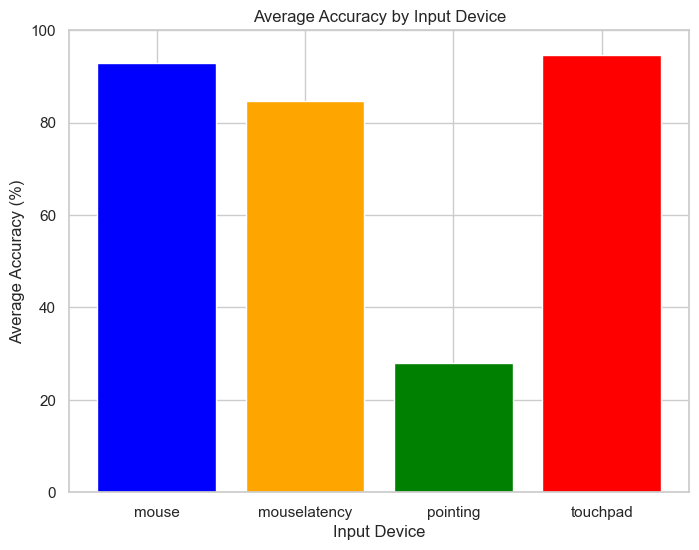

In [148]:
#grouping
avg_accuracy = df.groupby('Input Device')['Accuracy'].mean().reset_index()

#plots accuracy
def plot_average_accuracy(avg_accuracy):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(avg_accuracy['Input Device'], avg_accuracy['Accuracy'], color=['blue', 'orange', 'green', 'red'])
    ax.set_xlabel('Input Device')
    ax.set_ylabel('Average Accuracy (%)')
    ax.set_title('Average Accuracy by Input Device')
    ax.set_ylim(0, 100)
    plt.show()

plot_average_accuracy(avg_accuracy)

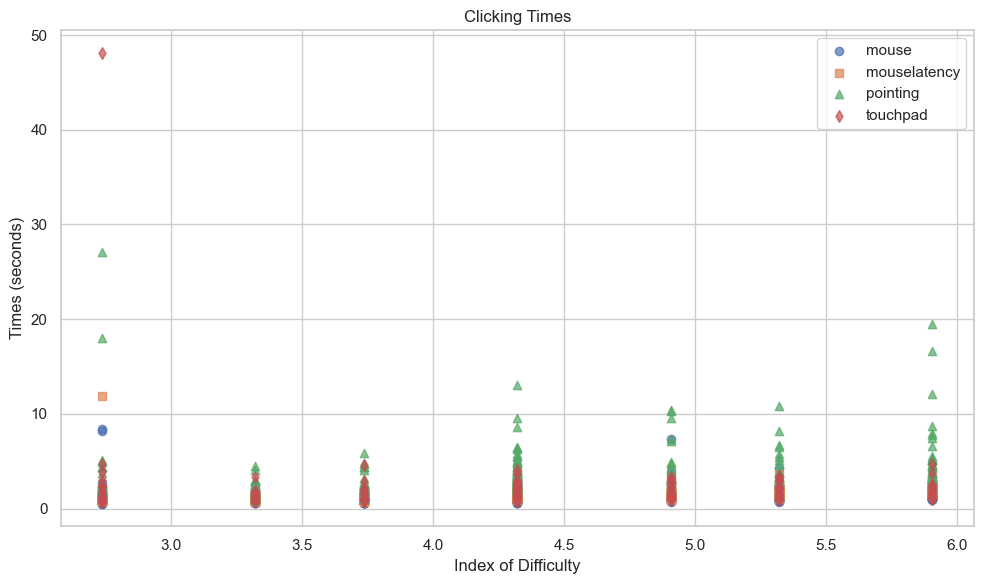

In [156]:
# Plotting

# Function to flatten nested lists 
#chat gpt
def flatten(lst):
    return [item for sublist in lst for item in sublist]


plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'd']  # Define markers for each device

for i, (device, group) in enumerate(df.groupby('Input Device')):
    flattened_click_times = flatten(group['Click Times'])
    ids = group['ID'].repeat(group['Total Clicks'] - group['Missed Clicks']).reset_index(drop=True)
    plt.scatter(ids, flattened_click_times, label=device, alpha=0.7, marker=markers[i])

plt.title('Clicking Times')
plt.xlabel('Index of Difficulty')
plt.ylabel('Times (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


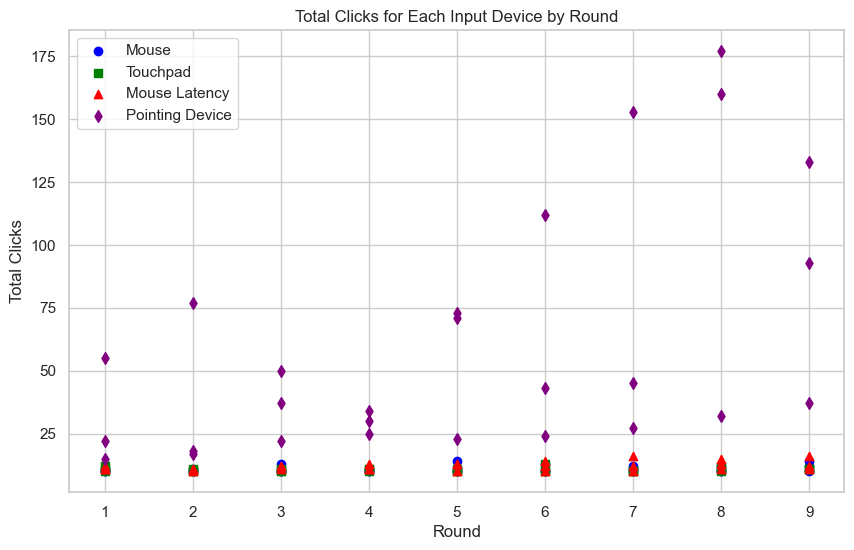

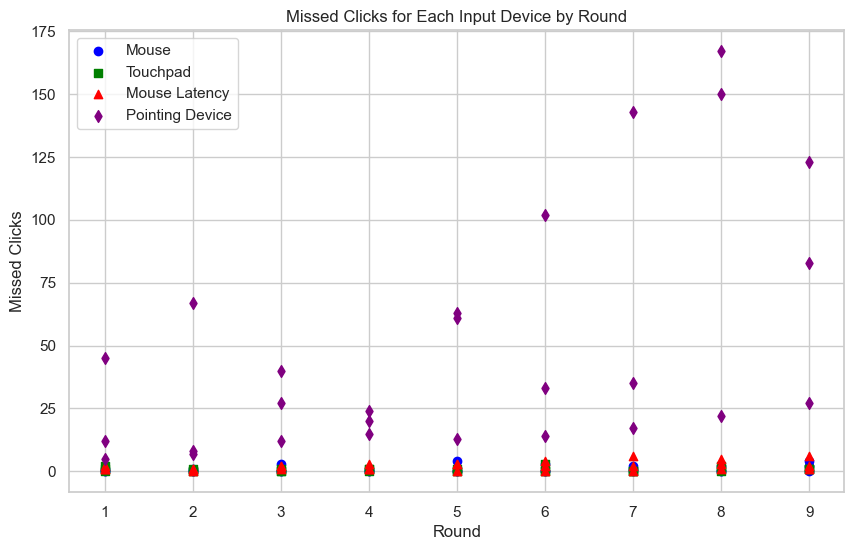

In [155]:
#total clicks
plt.figure(figsize=(10, 6))
plt.scatter(mouse_data['Round'], mouse_data['Total Clicks'], label='Mouse', color='blue', marker='o')
plt.scatter(touchpad_data['Round'], touchpad_data['Total Clicks'], label='Touchpad', color='green', marker='s')
plt.scatter(mouselatency_data['Round'], mouselatency_data['Total Clicks'], label='Mouse Latency', color='red', marker='^')
plt.scatter(pointing_data['Round'], pointing_data['Total Clicks'], label='Pointing Device', color='purple', marker='d')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Total Clicks')
plt.title('Total Clicks for Each Input Device by Round')
plt.legend()
plt.grid(True)
plt.show()

#---------
#misses
plt.figure(figsize=(10, 6))
plt.scatter(mouse_data['Round'], mouse_data['Missed Clicks'], label='Mouse', color='blue', marker='o')
plt.scatter(touchpad_data['Round'], touchpad_data['Missed Clicks'], label='Touchpad', color='green', marker='s')
plt.scatter(mouselatency_data['Round'], mouselatency_data['Missed Clicks'], label='Mouse Latency', color='red', marker='^')
plt.scatter(pointing_data['Round'], pointing_data['Missed Clicks'], label='Pointing Device', color='purple', marker='d')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Missed Clicks')
plt.title('Missed Clicks for Each Input Device by Round')
plt.legend()
plt.grid(True)
plt.show()

# There is a section discussing problems that occurred during the assignment. (1P)
both